# Task 2.5 Part 2

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [4]:
#download the weather images and put them in a directory
path = '/Users/marika/Desktop/Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [5]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [6]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [12]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 3, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 676ms/step - accuracy: 0.8469 - loss: 0.0635 - val_accuracy: 0.8170 - val_loss: 0.0764
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - accuracy: 0.8750 - loss: 0.0379 
Epoch 3/3


/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 660ms/step - accuracy: 0.8990 - loss: 0.0413 - val_accuracy: 0.8170 - val_loss: 0.0665


# I started with 1 epoch and then put 5 and the accuracy definitely increased but if I consider adding more epochs, I have to be cautious of overfitting. I went back and reduced it to 3 which seems to have generated a more accurate model. 

In [13]:
# Get the history dictionary
history_dict = model.history.history

# Find the minimum length of any list in the dictionary
min_length = min(len(v) for v in history_dict.values())

# Truncate each list in the dictionary to this minimum length
for key in history_dict:
    history_dict[key] = history_dict[key][:min_length]

# Now convert to a DataFrame
results = pd.DataFrame(history_dict)

# Display the results
print(results)

   accuracy      loss  val_accuracy  val_loss
0  0.855006  0.058755      0.816964  0.076377
1  0.875000  0.037905      0.816964  0.066549


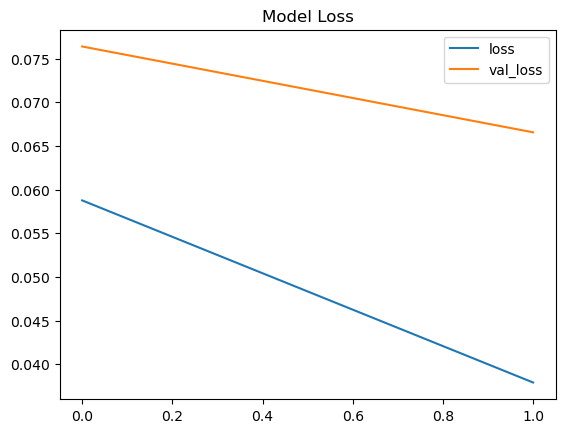

In [14]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

# Analysis of the Model Loss Plot:

Smooth and Consistent Decrease in Loss:
The plot shows a steady, downward trend in both the training loss (loss) and validation loss (val_loss). This suggests that the model is learning effectively and gradually reducing its prediction errors on both the training and validation datasets. The consistent decrease across epochs is a strong indicator that the model is not only fitting the training data well but also generalizing properly to the validation data.

No Signs of Overfitting:
Overfitting is typically indicated by a divergence between the training loss and validation loss (e.g., training loss continues to decrease while validation loss begins to increase). In the plot, both curves are decreasing together, suggesting that the model is not overfitting. The parallel reduction of training and validation loss implies that the model is learning useful patterns that generalize well to new data, rather than memorizing the training data.

Training Process Stability:
The absence of sudden jumps or spikes in the loss values indicates a stable training process. This suggests that the model parameters (e.g., learning rate, batch size) are well-tuned, and the data pipeline is functioning correctly.

# Next Steps:

Evaluate Accuracy Metrics:
Check the accuracy metrics (accuracy and val_accuracy) over the epochs. While loss gives a good indication of model performance, accuracy directly tells me how well the model is performing in terms of correctly classifying the digits.

Test on a Separate Test Set:
Evaluate the model on a separate test set that wasn't used during training or validation. This will give me a clear indication of how well your model performs on completely unseen data.

Cross-Validation:
If possible, use cross-validation to assess the model's performance across different subsets of the data. This helps ensure that the model's performance is not overly dependent on a specific split of the data.

Consider Hyperparameter Tuning:
While this model is performing well, I could explore hyperparameter tuning to see if further improvements are possible. Adjust parameters like learning rate, batch size, number of layers, or the number of units in each layer to find an optimal configuration.

Regularization and Dropout:
Even though there's no sign of overfitting, it might still be worth experimenting with regularization techniques, such as Dropout or L2 regularization, to further safeguard against overfitting, especially if I plan to train the model for more epochs.

Data Augmentation:
If I have limited data, consider using data augmentation techniques to artificially increase the size and diversity of your training dataset. This can further improve the model's generalization capabilities.

Learning Rate Scheduler:
Implement a learning rate scheduler to gradually reduce the learning rate during training. This can help the model converge more smoothly towards an optimal solution as the number of epochs increases.

Save and Deploy the Model:
If satisfied with the model’s performance, consider saving the trained model and deploying it to make predictions on new data. Ensuring to test the deployment process to verify that it works as expected.

# Conclusion:
The current model appears to be in a good state, showing a consistent and stable reduction in both training and validation loss. The next steps should focus on validating its performance on new data, potentially fine-tuning hyperparameters, and considering additional regularization or augmentation techniques if necessary.

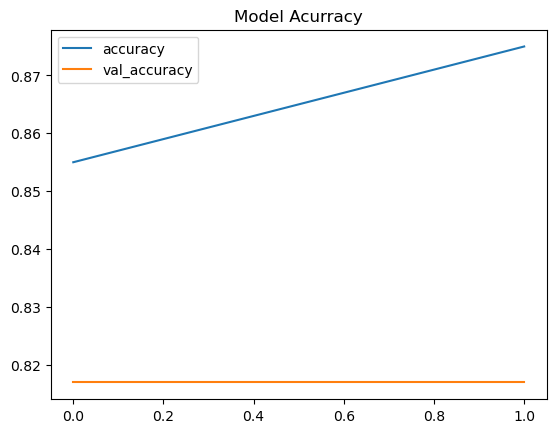

In [15]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [16]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.875, Val_Accuracy: 0.8169642686843872
Loss: 0.03790472447872162, Val_Loss: 0.06654874235391617


# Analysis:
Divergence Between Training and Validation Accuracy:
The training accuracy (blue line) is steadily increasing, which suggests that the model is learning and becoming more accurate at predicting the correct labels on the training data. However, the validation accuracy (orange line) is completely flat, staying around 82% and not improving at all, even as the training accuracy increases.

Potential Overfitting:
The most likely explanation for this pattern is that the model is overfitting to the training data. Overfitting occurs when the model learns the training data too well, including noise or irrelevant patterns, but fails to generalize to new, unseen data (validation data, in this case). The increase in training accuracy without a corresponding increase in validation accuracy suggests that the model is not learning patterns that generalize beyond the training dataset.

Stagnation of Validation Accuracy:
The flat validation accuracy indicates that despite more training, the model is not improving on the validation set. This could mean that the model has reached its capacity to learn from the available data, or it may indicate that the model is too complex for the given dataset, leading to overfitting.

# Next Steps:
Regularization:
To combat overfitting, consider adding regularization techniques such as Dropout layers or L2 regularization. This can help the model generalize better by preventing it from becoming too complex and overly tuned to the training data.

Early Stopping:
Implement early stopping to halt training when the validation accuracy stops improving. This can help prevent the model from overfitting to the training data.

Simplify the Model:
If overfitting persists, try simplifying the model by reducing the number of layers or units in each layer. A simpler model might generalize better to the validation set.

Data Augmentation:
Consider using data augmentation to artificially increase the size and variability of your training dataset. This can help the model learn more robust patterns that generalize better.

Cross-Validation:
Implement cross-validation to ensure that the model’s performance is consistent across different subsets of the data. This can help you confirm whether the flat validation accuracy is a result of overfitting or other issues.

Learning Rate Adjustment:
If there's suspicion that the model is not learning effectively, consider adjusting the learning rate. A lower learning rate might allow the model to learn more gradually and potentially improve validation accuracy.

# Conclusion:
The plot indicates that while the model is improving on the training data, it is not generalizing well to the validation data, likely due to overfitting. Implementing regularization, considering early stopping, simplifying the model, or increasing data diversity through augmentation are potential next steps to improve validation accuracy.

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step


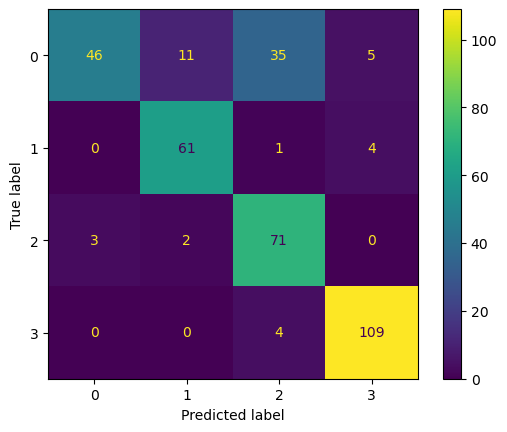

In [17]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Confusion Matrix Analysis:

# Interpretation of the Matrix:

Diagonal Elements: The numbers along the diagonal (from top-left to bottom-right) represent the instances where the model correctly predicted the class. In this case, the values are 46, 61, 71, and 109, meaning these are correctly classified instances for each respective class.

Off-Diagonal Elements: The numbers outside the diagonal represent misclassified instances. For example, in the first row, the model predicted class 2 instead of class 0 for 35 instances.

# Class-Specific Performance:

Class 0: The model correctly predicted 46 instances as class 0 but misclassified 11 as class 1, 35 as class 2, and 5 as class 3. This indicates that the model struggles with distinguishing class 0 from classes 1 and 2.

Class 1: The model has a high correct prediction count of 61 but made a few mistakes, primarily confusing class 1 with class 0 and class 3.

Class 2: Most instances are correctly classified as class 2 (71), with minor misclassifications into classes 0, 1, and 3.

Class 3: This class has the highest correct predictions (109) with minimal confusion, indicating that the model is particularly strong in identifying this class.

# Overall Performance:
The confusion matrix indicates that while your model has a relatively high accuracy for some classes (like class 3), it struggles more with others, especially class 0, where there are significant misclassifications.

# Next Steps:

Class Imbalance:
If certain classes have fewer instances or are harder to distinguish, consider techniques like class weighting, oversampling, or data augmentation to improve the model's ability to correctly classify those classes.

Refinement of the Model:
Given that some classes are more often misclassified, consider refining the model’s architecture, adjusting hyperparameters, or implementing techniques like ensemble learning to improve performance across all classes.

Error Analysis:
Perform a more detailed error analysis to understand why the model is misclassifying certain classes. Look into the features of the misclassified instances to see if there are patterns or similarities that could inform model adjustments.

In [19]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


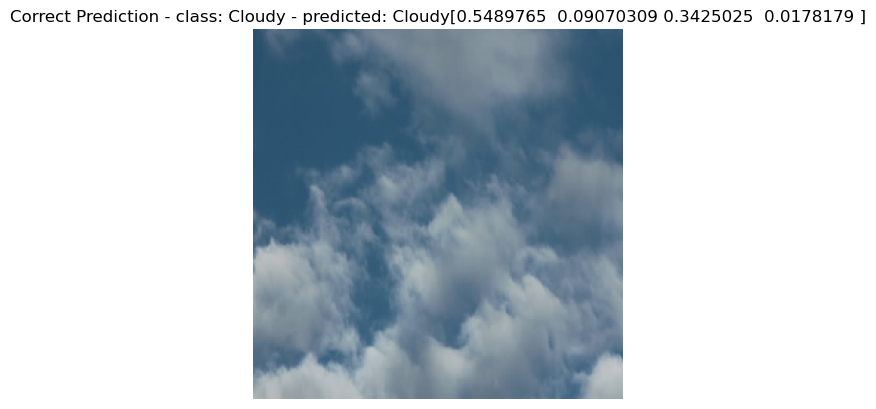

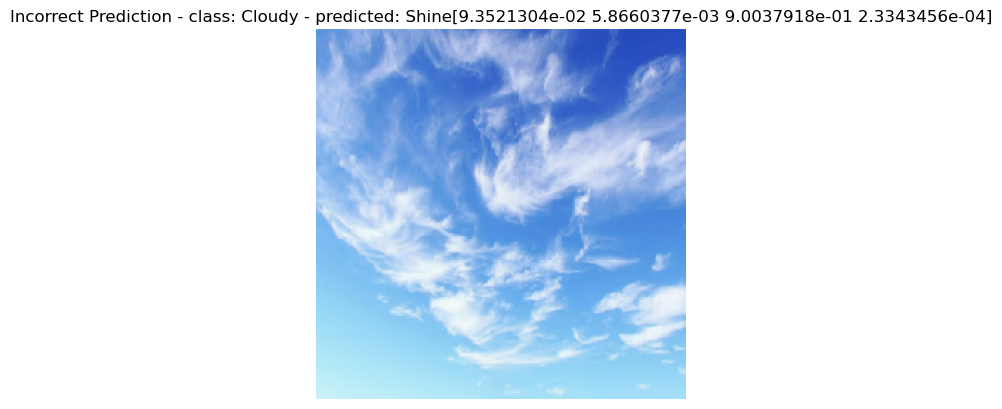

In [21]:
predict_one(model, 2) #<--you can show multiple pictures with this command. Just fill in the number you want to see.

# Proposal for the Use of GANs in Weather Prediction

Generative Adversarial Networks (GANs) have shown immense potential in generating realistic data, and they can be leveraged in weather prediction for several innovative applications. Below are three ideas outlining the potential uses of GANs in the field of weather prediction:

1. Synthetic Weather Data Generation for Model Training
GANs can be employed to generate synthetic weather data that mimics real-world conditions. This is particularly useful in situations where there is a lack of historical weather data for specific regions or extreme weather events. By generating realistic synthetic datasets, GANs can help train predictive models on a broader range of scenarios, improving their ability to forecast rare or extreme weather conditions. This would enhance the robustness and accuracy of weather prediction models, especially in regions with limited historical data.

2. Image-to-Image Translation for Enhanced Weather Imagery
GANs can be used for image-to-image translation tasks, such as enhancing satellite or radar imagery. For example, GANs could be trained to translate low-resolution satellite images into high-resolution ones or to fill in missing data in weather images. This would provide meteorologists with clearer and more detailed images, leading to better interpretation of weather patterns and more accurate predictions. Enhanced imagery can also be used to visualize potential future weather scenarios, aiding in decision-making processes.

3. Downscaling Climate Models for Regional Predictions
Climate models often provide data at a coarse spatial resolution, which may not be suitable for regional weather predictions. GANs can be applied to downscale these models, generating high-resolution weather data from lower-resolution global climate models. This process, known as super-resolution, allows for more precise regional weather predictions, helping local governments and industries prepare for specific weather events. By improving the spatial resolution of weather predictions, GANs can make climate model outputs more actionable at the local level.

# Conclusion
The integration of GANs into weather prediction can significantly enhance data generation, image resolution, and model downscaling, leading to more accurate and reliable weather forecasts. By addressing the limitations of existing datasets and improving the quality of predictive models, GANs offer a promising avenue for advancing the field of meteorology.